In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d

In [6]:
class gd_pv_2d:
    
    def __init__(self, fn_loss, fn_grad):
        self.fn_loss = fn_loss
        self.fn_grad = fn_grad
    
    #x_init is a list of variables     
    def find_min(self, x_init, n_iter, eta, tol):
        #self.x_init = x_init
        #self.n_iter = n_iter
        #self.eta = eta
        #self.tol = tol
        x = x_init
        
        loss_path = []
        x_path = []
        #x_path = np.zeros([n_iter+1,2])
        
        x_path.append(x)
        #x_path[0,:] = x
        loss_this = self.fn_loss(x[0],x[1])
        loss_path.append(loss_this)
        g = self.fn_grad(x[0],x[1])

        for i in range(n_iter):
            if g[0] < tol[0] and g[1] < tol[1] :
                break
            g = self.fn_grad(x[0],x[1])
            x[0] += -eta[0] * g[0]
            x[1] += -eta[1] * g[1]
            x = [x[0],x[1]]
            x_path.append(x)
            #x_path[i] = x
            loss_this = self.fn_loss(x[0],x[1])
            loss_path.append(loss_this)
            
        self.loss_path = loss_path
        self.x_path = x_path
        self.loss_fn_min = loss_this
        self.x_at_min = x

In [7]:
#Six-Hump Camel Function#

In [8]:
def fn_loss(x_0,x_1):
    return (4-2.1*x_0**2+x_0**4/3)*x_0**2 + x_0*x_1 + (-4+4*x_1**2)*x_1**2
    
def fn_grad(x_0,x_1):
    delta_0 = 8*x_0-8.4*x_0**3 + 2*x_0**5+x_1
    delta_1 = -8*x_1 + 16*x_1**3 + x_0
    return np.array([delta_0, delta_1])

In [9]:
solver = gd_pv_2d(fn_loss = fn_loss, fn_grad = fn_grad)
solver.find_min(x_init = [1,1], n_iter = 10000, eta = [0.001,0.001], tol = [1e-3,1e-3])
print('The minimum of the loss function is {}'.format(np.round(solver.loss_fn_min, 12)))
print('The value of x which generates the minimum is {}'.format(np.round(solver.x_at_min, 7)))

The minimum of the loss function is -1.031628388878
The value of x which generates the minimum is [-0.0897132  0.7126416]


Text(0.5, 0, 'loss path')

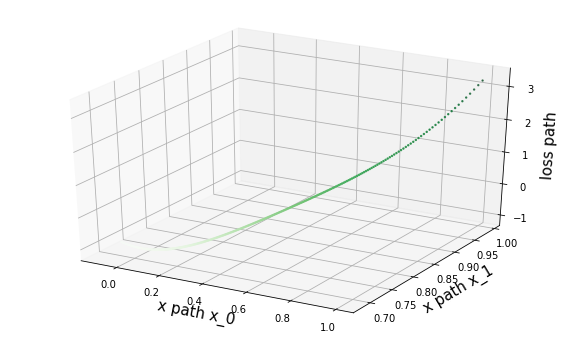

In [22]:
fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection='3d')

# Data for three-dimensional scattered points
zdata = solver.loss_path
xdata = np.array(solver.x_path)[:,0]
ydata = np.array(solver.x_path)[:,1]


ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens',s = 2);
ax.set_xlabel('x path x_0',fontsize=15)
ax.set_ylabel('x path x_1',fontsize=15)
ax.set_zlabel('loss path',fontsize=15)

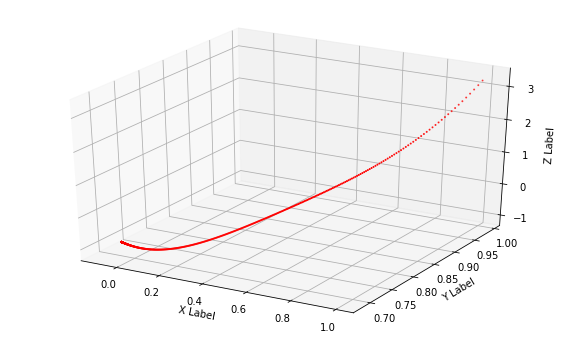

In [23]:
fig = plt.figure(figsize = (10, 6))
ax = fig.add_subplot(111, projection='3d')

zdata = solver.loss_path
xdata = np.array(solver.x_path)[:,0]
ydata = np.array(solver.x_path)[:,1]


ax.scatter(xdata, ydata, zdata, c='r',s=1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

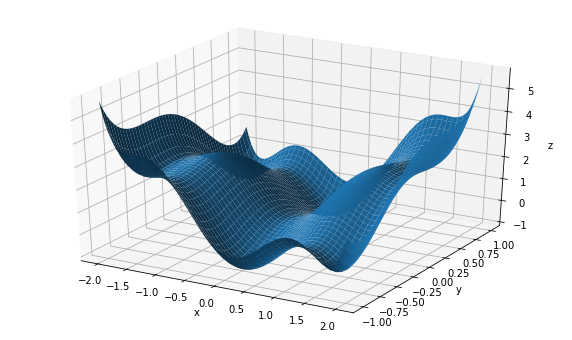

In [21]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 1, 100)

X, Y = np.meshgrid(x, y)
Z = fn_loss(X, Y)
fig = plt.figure(figsize = (10, 6))
ax = plt.axes(projection='3d')


ax.plot_surface(X, Y, Z)

#ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');